# 입력 이미지를 슈퍼픽셀로 분리


In [40]:
# Number of segments
S = 4

# image path
fpath_in = 'sky02.jpg'

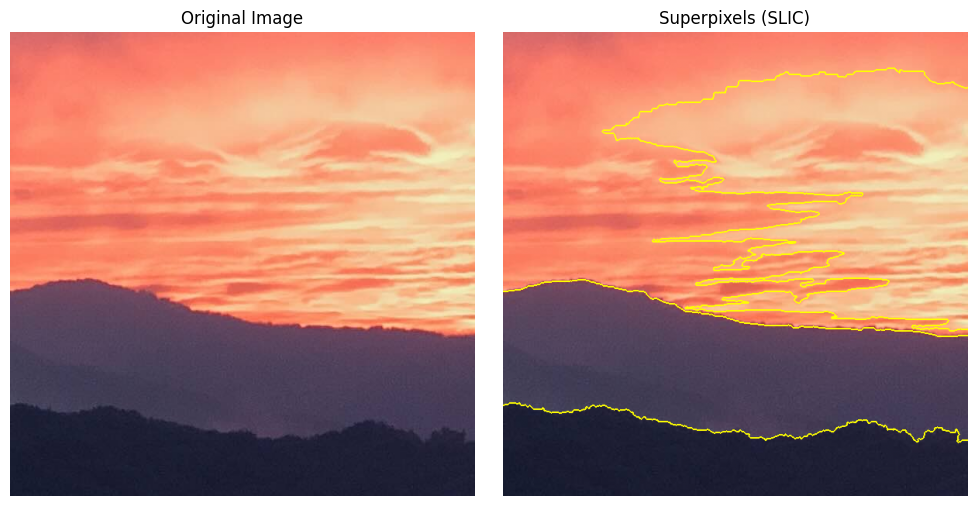

In [41]:
import matplotlib.pyplot as plt
from skimage import io, segmentation, color, graph
from skimage.segmentation import mark_boundaries

# 이미지 로드 (URL 또는 로컬 경로 가능)
image = io.imread(fpath_in)

# SLIC 알고리즘 적용
segments = segmentation.slic(image, n_segments=S, compactness=10, start_label=1)

# 경계선을 원본 이미지에 표시
image_with_boundaries = mark_boundaries(image, segments)

# 결과 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Superpixels (SLIC)")
plt.imshow(image_with_boundaries)
plt.axis("off")

plt.tight_layout()
plt.show()

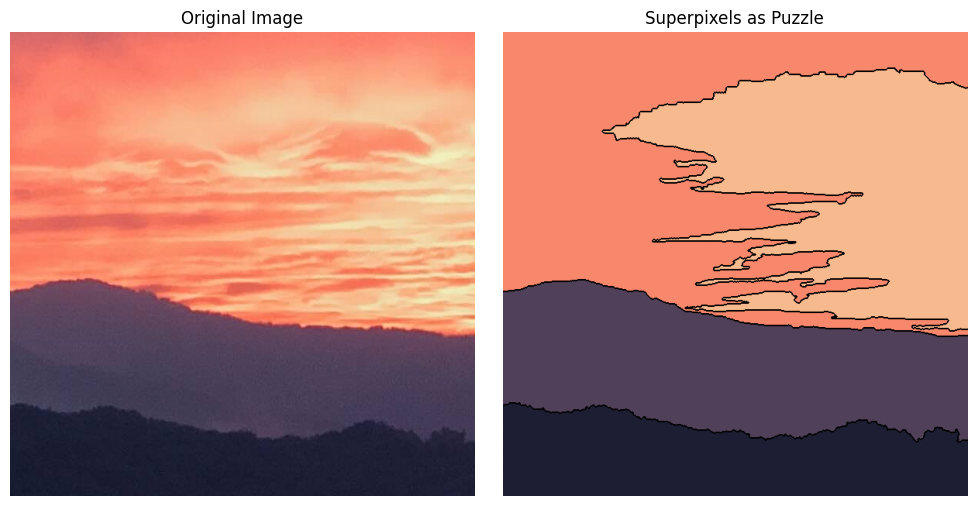

In [42]:
import matplotlib.pyplot as plt
from skimage import io, segmentation, color
from skimage.segmentation import mark_boundaries
import numpy as np

# 이미지 불러오기 (또는 본인 이미지 경로 사용)
image = io.imread(fpath_in)

# SLIC 슈퍼픽셀 분할
segments = segmentation.slic(image, n_segments=S, compactness=10, start_label=1)

# 퍼즐 조각처럼 보이도록: 각 슈퍼픽셀에 고유 색상 입히기
superpixel_colored = color.label2rgb(segments, image, kind='avg')  # avg: 각 영역 평균 색으로 채움

# 경계선 강조 (퍼즐 조각 경계처럼)
puzzle_effect = mark_boundaries(superpixel_colored, segments, color=(0, 0, 0))  # 검정색 경계선

# 결과 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Superpixels as Puzzle")
plt.imshow(puzzle_effect)
plt.axis("off")

plt.tight_layout()
plt.show()